In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp
corr = Correlation(perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps', spot_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots')

In [8]:


df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/YFII_historical_data.csv').change_resolution('30T', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/YFII-PERP_historical_data.csv').change_resolution('30T', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low', 'close': 'perp_close', 'volume': 'perp_volume'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low', 'close': 'spot_close', 'volume': 'spot_volume'}, inplace=True)
                            
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])

joint_df['spread_open'] = joint_df['perp_open'] - joint_df['spot_open']
joint_df['spread_open%'] = (joint_df['perp_open'] - joint_df['spot_open'])/joint_df['perp_open']*100

joint_df['spread_high'] = joint_df['perp_high'] - joint_df['spot_high']
joint_df['spread_high%'] = (joint_df['perp_high'] - joint_df['spot_high'])/joint_df['perp_high']*100

joint_df['spread_low'] = joint_df['perp_low'] - joint_df['spot_low']
joint_df['spread_low%'] =(joint_df['perp_low'] - joint_df['spot_low'])/joint_df['perp_low']*100

joint_df['spread_close'] = joint_df['perp_close'] - joint_df['spot_close']
joint_df['spread_close%'] = (joint_df['perp_close'] - joint_df['spot_close'])/joint_df['perp_close']*100

joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')
joint_df

,perp_volume,funding_rate,spot_volume,spread_open,spread_open%,spread_high,spread_high%,spread_low,spread_low%,spread_close,spread_close%
timestamp,,,,,,,,,,,
2021-01-08T06:34:00+00:00,5365.45925,NaN,956.1195,1.125,0.065095,16.50,0.897593,0.00,0.000000,16.75,0.915551
2021-01-08T07:00:00+00:00,27417.63600,0.000161,766.4860,16.750,0.915551,16.75,0.915551,4.75,0.265067,-1.50,-0.082942
2021-01-08T07:30:00+00:00,91173.87350,0.000161,2863.5920,-1.500,-0.082942,52.75,2.760696,-17.25,-0.963418,21.75,1.165595
2021-01-08T08:00:00+00:00,35195.92250,0.000520,31988.8655,24.500,1.311037,20.50,1.095964,19.75,1.087855,-1.50,-0.081147
2021-01-08T08:30:00+00:00,92815.48125,0.000520,363043.9035,-1.500,-0.081147,13.25,0.700132,-20.00,-1.092896,3.00,0.160858
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02T23:00:00+00:00,29821.53425,0.000166,0.0000,10.750,0.389493,9.75,0.350625,12.50,0.453186,12.75,0.458839
2021-04-02T23:30:00+00:00,17387.04025,0.000166,0.0000,12.750,0.458839,13.00,0.467038,18.50,0.667027,13.25,0.477348
2021-04-03T00:00:00+00:00,26475.53100,0.000182,33.3930,13.250,0.477348,11.00,0.391250,19.00,0.684500,12.00,0.429069


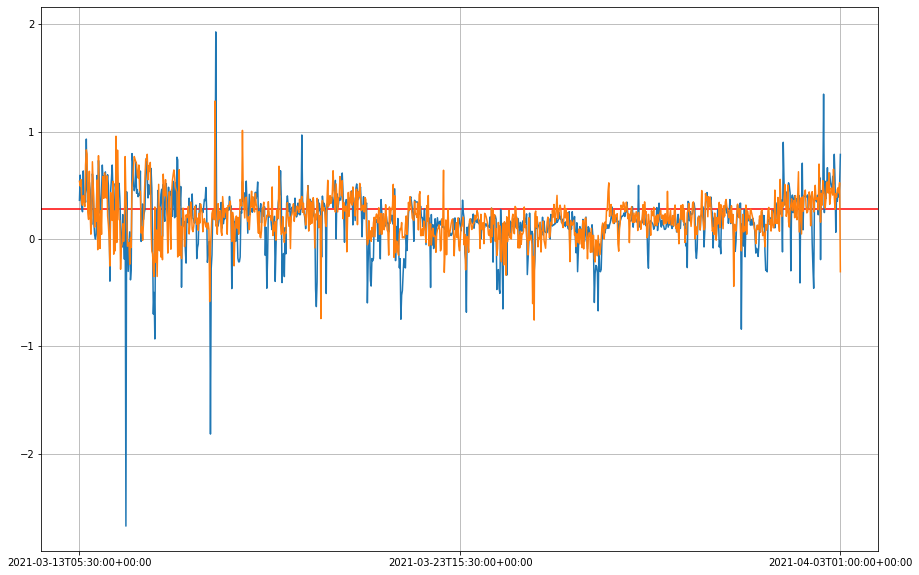

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
spread_high=joint_df['spread_high%'].tail(1000)
spread_low=joint_df['spread_low%'].tail(1000)
spread_low=joint_df['spread_close%'].tail(1000)

ax.set_xticks([0, 500, 999])
ax.grid()
ax.axhline(y=0.28, color='r', linestyle='-')

ax.plot(spread_high)
ax.plot(spread_low)

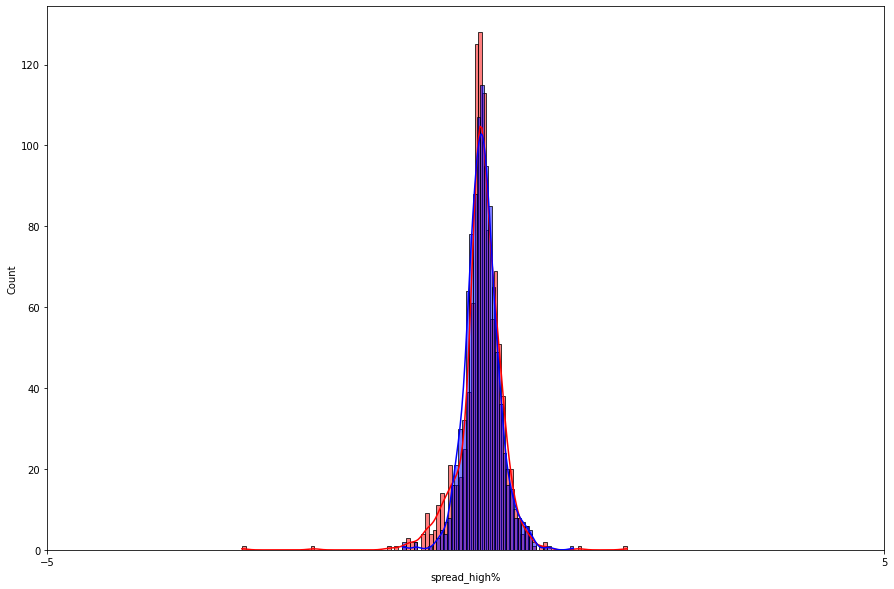

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread_high, color='r', kde=True)
# sns.histplot(data=spread_low, color='g', kde=True)
sns.histplot(data=spread_low, color='blue', kde=True)

ax.set_xticks([-5,5])

In [11]:
min_std = np.std(joint_df['spread_close%'].tail(9600))
min_std 

0.3087084358190235

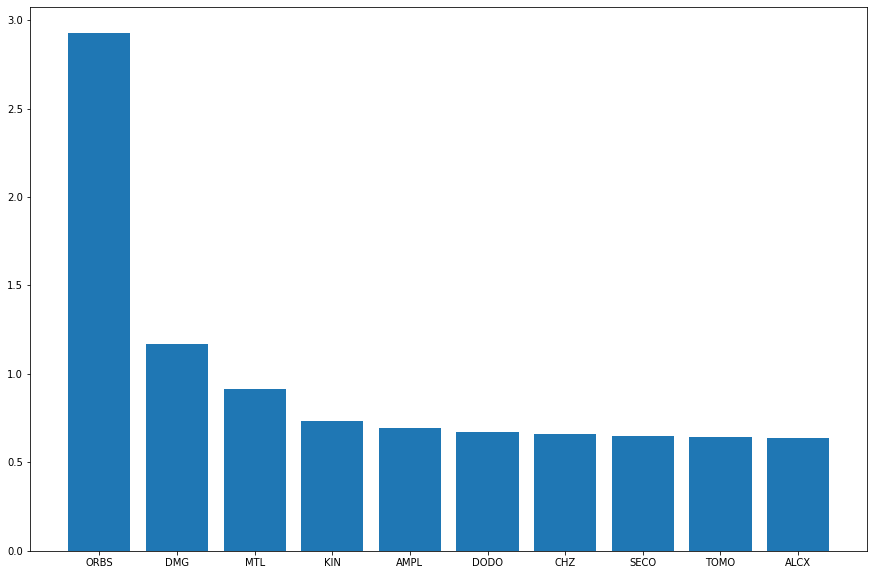

In [3]:
corr.rank_vol('H', lookback_period = 1000)
